# Manejo Datasets para modelos

Generar "dos bases de datos" previo a iniciar cualquier modelo predictivo es uno de los pasos fundamentales, a estas dos bases de datos se les conoce como el conjunto de entrenamiento y el conjunto de testeo del modelo. 

En algunos casos se crea un tercer conjunto que se le conoce como el conjunto de validación.

Los conjuntos de datos se utilizan así:
1. Entrenamiento (Training): Dataset con el que se construye el modelo, se realizan los calculos, se establecen los parámetros y ecuaciones. (70 - 80% del set)
2. Testeo (Test): Dataset utilizado para validar la eficacia del modelo. Se revisa la salida que genera el modelo frente a la realidad, así se observa que tan verídico es o no el modelo. (30 - 20% del set).


Dentro de los elementos a tener en cuenta al realizar un modelo son:
1. Sobreajuste (Overffiting): El modelo se ajusta perfectamente a los datos de entrenamiento, sin dejar posibilidad a error. Sin embargo, al realizar el testeo se observa que el modelo ya no funciona tan eficientemente.
2. Durante la creación de los set de datos para entrenamiento y testeo es importante tener en cuenta si existe alguna variable relacional como el tiempo, si la información viene de distintas fuentes de datos (append).
      a. Se recomienda por tanto para estas divisiones un aleatorio, a través de distribuciones normales, o de otros tipos de tal forma que se evite sesgar de alguna forma los datos.
3. El modelo de testeo nos ayuda a determinar si hace falta afinar algún parámetro o hiperparámetro dentro del modelo para que sea más eficiente.
4. Matrices sparse: Elementos o data sets que continen un número significativo de datos vacíos.

In [1]:
# Librería para el manejo de sets de train y test
from sklearn.model_selection import train_test_split
import sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Cargue del data set de datos
data = pd.read_csv("../python-ml-course-master\datasets\customer-churn-model/Customer Churn Model.txt")

In [4]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Generar sets a través de distribución normal

In [5]:
# Generar la distribución normal del tamaño del set de datos
normal = np.random.randn(len(data))

(array([  1.,  13., 101., 392., 926., 999., 639., 218.,  42.,   2.]),
 array([-4.24922343, -3.43861202, -2.6280006 , -1.81738919, -1.00677777,
        -0.19616636,  0.61444505,  1.42505647,  2.23566788,  3.04627929,
         3.85689071]),
 <a list of 10 Patch objects>)

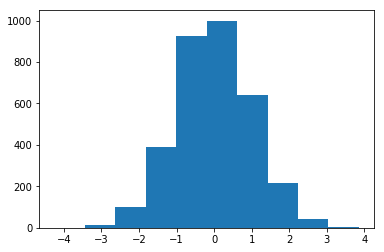

In [6]:
# Generar el histograma para ver la distribución normal
plt.hist(normal)

In [7]:
# 1. Puedo dividir el set de datos a partir de un cierto valor.
Check = (normal <= 0.8)

# Reviso que el set ahora maneja datos booleanos.
Check

array([ True, False,  True, ..., False,  True,  True])

(array([ 724.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2609.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

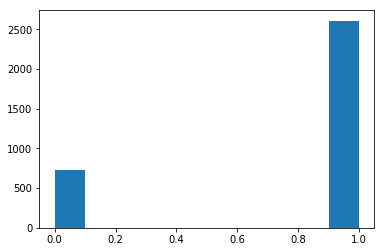

In [8]:
# Validar como ha quedado el conjunto check a través de un plot
plt.hist(Check.astype(int))

In [9]:
# Crear el conjunto de training con los valores verdaderos.
Training = data[Check]
# Crear el set de test con los valores falsos (se usa el ~ para seleccionar los opuestos)
Testing = data[~Check]

In [10]:
# Deteminar la extensión de los set de datos
print ("El conjunto de training tiene "+ str(len(Training))+
      " , mientras el conjunto de test tiene "+ str(len(Testing)))

El conjunto de training tiene 2609 , mientras el conjunto de test tiene 724


### Uso de la librería Sklearn

In [11]:
# Crear los conjuntos de datos a partir de la función predefinida:
train, test = train_test_split(data, test_size = 0.2)

In [12]:
# Deteminar la extensión de los set de datos
print ("El conjunto de training tiene "+ str(len(train))+
      " , mientras el conjunto de test tiene "+ str(len(test)))

El conjunto de training tiene 2666 , mientras el conjunto de test tiene 667


### Usando una función de shuffle

In [13]:
# Revisando el orden actual del set de datos
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [14]:
# Primero que debo hacer es mezclar "barajar" el set de datos.
data_1 = sklearn.utils.shuffle(data)

In [15]:
# Una vez tengo mezclado el set de datos procedo a crear el train y test
corte = int(0.75*len(data_1))
train = data_1[:corte]
test = data_1[corte+1:]

In [16]:
# Deteminar la extensión de los set de datos
print ("El conjunto de training tiene "+ str(len(train))+
      " , mientras el conjunto de test tiene "+ str(len(test)))

El conjunto de training tiene 2499 , mientras el conjunto de test tiene 833


### Concatenar datasets por filas

En el momento que se desea realizar el join o el merge entre dos bases, es necesario tener presente que:
* Axis = 0 hace referencia al eje horizontal (apilar uno debajo del otro)
* Axis = 1 hace referencia al eje vertical (filas)



In [17]:
# Importando los sets de datos
Red_wine = pd.read_csv("../python-ml-course-master\datasets\wine/winequality-red.csv", sep = ";")
White_wine = pd.read_csv("../python-ml-course-master\datasets\wine/winequality-white.csv", sep = ";")

In [18]:
# Conocer un poco sobre el data set
Red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
# Conocer un poco sobre el data set
White_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [20]:
# Revisando los nombres de las columnas
print(Red_wine.columns.values)
print("-----------------------")
print(White_wine.columns.values)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']
-----------------------
['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


In [21]:
print(Red_wine.shape)
print ("---------------")
print(White_wine.shape)

(1599, 12)
---------------
(4898, 12)


In [22]:
# Generar un solo data set, mantendrá el número de columnas y colocará debajo las filas
Wine_data = pd.concat([Red_wine, White_wine], axis = 0 )
Wine_data.shape

(6497, 12)

In [23]:
#Al utilizar pandas.concat se debe tener presente que el orden del dataset será igual al orden que ingrese cada set
Wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
# Creación de data sets para distintos cruces o joins
data1 = Wine_data.head(10)
data2 = Wine_data[300:310]
data3 = Wine_data.tail(10)

In [25]:
# Validar como se ve el set de datos al unirlo por axis 0
Wine_scramble = pd.concat([data1, data2, data3], axis = 0)
Wine_scramble

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


### Escenario real - Carga de datos a todo nivel

Somos una empresa que a diario realiza mediciones de Nitrato y Sulfato, para ello se utilizan distintos tipos de medidores, cada medidor genera su propio set de datos, por lo cual se tiene por medidor un archivo csv con información histórica de los últimos 4 años.

El objetivo es poder cargar la información lo más eficiente posible, concatenando y dejando todo listo para los análisis.

 Ahora si manos a la obra
 1. Importar el primer set de datos para tener la base
 2. Realizar un bucle para ir recorriendo cada set de datos y anexarlo.
     a. Importante que tengan un patrón común.
 3. Repetir el bucle hasta que no queden sets de datos.

In [26]:
# Crear un filepath para tener acceso a la ubicación donde están todos los datos.
filepath = "../python-ml-course-master\datasets\distributed-data/"

In [27]:
# Cargue del primer set de datos para entender los datos.
base = pd.read_csv("../python-ml-course-master\datasets\distributed-data/001.csv")
base.head()

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


In [28]:
# Crear un contador para las filas que se van añadiendo

file_length = len(base)

# Creación del bucle
for i in range(2,333):
    if i < 10:
        filename = "00"+str(i)
    elif i < 100:
        filename = "0"+str(i)
    elif i < 1000:
        filename = str(i)
    file = filepath + filename+".csv"
    temp_data = pd.read_csv(file)
    file_length += len(temp_data)
    base = pd.concat([base, temp_data], axis = 0)

In [29]:
# Validación que se han cargado todos los datos y concatenado
base.shape

(772087, 4)

In [30]:
# Validación que ha cargado hasta el último fichero (# 332)
base.tail()

,Date,sulfate,nitrate,ID
726,2004-12-27,NaN,NaN,332
727,2004-12-28,NaN,NaN,332
728,2004-12-29,NaN,NaN,332
729,2004-12-30,NaN,NaN,332
730,2004-12-31,NaN,NaN,332


In [31]:
# Revisión de la cantidad igual al tamaño final del set de datos
file_length == base.shape[0]

True

### Joins y Merge entre datasets
Revisar los encoding de los archivos en los que pueden estar guardados
Left, Right, Inner join, Full Join son los más comunes.

Para este caso vamos a suponer que somos analistas deportivos, para ello se nos ha suministrado una serie de bases de datos relacionadas con los juegos olímpicos a las cuales se les hará el procesamiento respectivo.

In [32]:
# Crear un file path para el archivo a trabajar
filepath = "../python-ml-course-master/datasets/athletes/"

In [33]:
# Cargar el set de datos de los atletas que han ganado medallas
medals = pd.read_csv(filepath+"Medals.csv", encoding = "ISO-8859-1")
medals.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


In [34]:
# Revisando el total de casos que tiene el data set.
medals.shape

(8618, 8)

In [35]:
# Contar los atletas únicos que tiene el data set.
Atletas = medals["Athlete"].unique().tolist()
len(Atletas)

6956

In [36]:
# Cargar el dataset con los países que representa cada atleta.
country = pd.read_csv(filepath + "Athelete_Country_Map.csv", encoding = "ISO-8859-1")
country.head()

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


In [37]:
# Revisando el total de casos del data set.
country.shape

(6970, 2)

In [38]:
# Contar los países únicos.
Country = country["Country"].unique().tolist()
len(Country)

110

###### Pregunta del millón: 
Si en la parte superior agrupe por los atletas unicos y la base de datos de países contiene los atletas por país. ¿Por qué tengo más atletas en una base que en la otra?

In [39]:
# Validación de duplicados en la base de country.
Dup_Country = country.groupby(["Athlete"]).count()
Dup_Country.head()

,Country
Athlete,
A. J. Mleczko,1
Aaron Armstrong,1
Aaron Egbele,1
Aaron Gate,1
Aaron McIntosh,1


In [40]:
# Identificación de todos los casos que aparecen con más de un país en la base de datos
Dup_2 = Dup_Country[Dup_Country["Country"]>1]
Dup_2.index

Index(['Aleksandar Ciric', 'Aleksandar apic', 'Chen Jing', 'David Musulbes',
       'Dejan Savic', 'Denis efik', 'Gyuzel Manyurova', 'Iván García',
       'Matt Wells', 'Richard Thompson', 'Slobodan Nikic', 'Vanja Udovicic',
       'Vlada Vujasinovic'],
      dtype='object', name='Athlete')

In [41]:
# Revisión de los casos duplicados con que países están.
country[country["Athlete"].isin(Dup_2.index)]

,Athlete,Country
528,Richard Thompson,Trinidad and Tobago
608,Gyuzel Manyurova,Kazakhstan
678,David Musulbes,Slovakia
721,Gyuzel Manyurova,Russia
773,David Musulbes,Russia
986,Slobodan Nikic,Serbia
1014,Vanja Udovicic,Serbia
1029,Aleksandar Ciric,Serbia
1061,Aleksandar apic,Serbia
1062,Dejan Savic,Serbia


In [42]:
# Cargar el dataset con los deportes en los que participó cada atleta.
sports = pd.read_csv(filepath + "Athelete_Sports_Map.csv", encoding = "ISO-8859-1")
sports.head()

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


In [43]:
# Revisión de cuantos atletas por distintos deportes tenemos
len(sports)

6975

In [44]:
# Identificar los atletas con más de un deporte
Dup_3 = sports.groupby(["Athlete"]).count()
Dup_3.head()

,Sport
Athlete,
A. J. Mleczko,1
Aaron Armstrong,1
Aaron Egbele,1
Aaron Gate,1
Aaron McIntosh,1


In [45]:
Dup_3 = Dup_3[Dup_3["Sport"]>1]
Dup_3.head()

,Sport
Athlete,
Chen Jing,2
Fabiana,2
Iván García,2
Jang Seong-Ho,2
Juliana,2


In [46]:
len(Dup_3)

18

In [47]:
# Deportes que realizan algunos de los atletas duplicados
sports[(sports["Athlete"]== "Chen Jing") |
       (sports["Athlete"]== "Fabiana") |
       (sports["Athlete"]== "Iván García")
      ]

,Athlete,Sport
1196,Fabiana,Volleyball
1308,Chen Jing,Volleyball
1419,Chen Jing,Table Tennis
4442,Fabiana,Football
5021,Iván García,Diving
6791,Iván García,Athletics


#### Función Merge de pandas

In [48]:
# Merge information about medals and countries
data_main_country = pd.merge(left = medals, right = country,
                            left_on = "Athlete", right_on = "Athlete" )
data_main_country.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States


In [49]:
# Revisión qel tamaño que quedo con el cruce de datos
data_main_country.shape

(8657, 9)

In [50]:
# Revisión de los casos duplicados con dos países
data_main_country[data_main_country["Athlete"]== "Aleksandar Ciric"]

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
1503,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia
1504,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia and Montenegro
1505,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia
1506,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia and Montenegro
1507,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia
1508,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia and Montenegro


In [51]:
# A partir d elo anterior vamos a quitar los athletas duplicados.
Country_non_dp = country.drop_duplicates(subset = "Athlete")
print(Country_non_dp.shape)
print(country.shape)

(6956, 2)
(6970, 2)


In [52]:
# Crear nuevamente el merge pero esta vez con la base sin duplicados
data_main_country = pd.merge(left = medals, right = Country_non_dp,
                            left_on = "Athlete", right_on = "Athlete")
print(data_main_country.shape)
data_main_country.head()

(8618, 9)


,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States


In [53]:
# Revisión de los casos duplicados con dos países
data_main_country[data_main_country["Athlete"]== "Aleksandar Ciric"]

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
1491,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia
1492,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia
1493,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia


In [54]:
# Base de deportes sin duplicados por atleta
sports_non_dp = sports.drop_duplicates(subset = "Athlete")
sports_non_dp.head()

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


In [55]:
# Anexar la base de deportes al previo creado
data_main = pd.merge( left = data_main_country, right = sports_non_dp,
                     left_on = "Athlete", right_on = "Athlete" 
)
print(data_main.shape)
data_main.head()

(8618, 10)


,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States,Swimming
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States,Swimming
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States,Swimming
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States,Swimming
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States,Swimming


#### Tipos de Joins

**Inner Join < A (Left Join) , B (Right Join) <= Full Join**

##### Inner Join

* Devuelve un data frame con las filas que tienen tanto en el primer como en el segundo data frame que se están uniendo.
* El número de filas será igual al número de filas **comunes** que tengan los dos data set.
    * Data set A tiene 50 filas
    * Data set B tiene 40 filas
    * Ambos comparten 30 filas en común
    * Entonces A inner join B generará 30 filas.
* En términos de teoría de conjuntos, se trata de la **intersección** de los dos conjuntos de datos.

<img src="../python-ml-course-master/IMG/innerjoin.png">

*Dado que las bases tienen total consistencia, vamos a generar un set auxiliar y de esta forma ver como funcionan los join*

**NOTA**: *Siempre que quiera negar una expresión, puedo usar el operador ~ y la expresión será negada.

In [64]:
# Generar un segmento del data set medallas -- Replace me evita escoger dos veces el mismo
Out_Athelete = np.random.choice(medals["Athlete"], 10, replace = False)
Out_Athelete

array(['Sun Dandan', 'Natalie Hodgskin', 'Gong Zhichao', 'Maksim Marinin',
       'Ernie Young', 'Yury Styopkin', 'Ryan Getzlaf', 'Vincent Defrasne',
       'Nataliya Liapina', 'Mike Kohn'], dtype=object)

In [65]:
# Generar el set de datos con los atltas borrados
country_dlt = Country_non_dp[(~Country_non_dp["Athlete"].isin(Out_Athelete)) &
                             (Country_non_dp["Athlete"] != "Michael Phelps")]
country_dlt.head()                              

,Athlete,Country
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States
5,Ryan Lochte,United States


In [67]:
# Repetir los pasos anteriores para el caso de deportes
sports_dlt = sports_non_dp[(sports_non_dp["Athlete"].isin(Out_Athelete)) &
                          (sports_non_dp["Athlete"] != "Missy Franklin")]
sports_dlt.head()

,Athlete,Sport
493,Vincent Defrasne,Biathlon
1972,Sun Dandan,Short-Track Speed Skating
2086,Natalie Hodgskin,Softball
3264,Yury Styopkin,Judo
3299,Ryan Getzlaf,Ice Hockey


In [70]:
# Data set de medals con country_dlt
Inner_Merged = pd.merge(left = medals, right = country_dlt,
                        how = "inner",
                        left_on = "Athlete" , right_on = "Athlete")
print(Inner_Merged.shape)
Inner_Merged.head()

(8604, 9)


,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
1,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States
2,Natalie Coughlin,29.0,2012,08/12/2012,0,0,1,1,United States
3,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia
4,Alicia Coutts,24.0,2012,08/12/2012,1,3,1,5,Australia


#### Left Join
* Devuelve un data frame con las filas que tienen valor en el data set de la izquierda, sin importar si tienen correspondencia en el de la derecha o no.
* Las filas del data frame final que no correspondan a ninguna fila del dataframe derecho, tendran **NAN** en las columnas del data frame derecho.
* El número de filas será igual al número de filas del data frame **izquierdo**.
    * Data set A tiene 50 filas
    * Data set B tiene 40 filas
    * Entonces A left join B generará 50 filas.
* En términos de teoría de conjuntos, se trata del data set de la **izquierda**, el cual tiene en si mismo la **intersección**.

<img src="../python-ml-course-master/IMG/leftjoin.png">

In [71]:
Left_Merged = pd.merge(left = medals, right = sports_dlt,
                       how = "left",
                       left_on = "Athlete" , right_on = "Athlete"
)
print(Left_Merged.shape)
Left_Merged.head()

(8618, 9)


,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,NaN
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,NaN
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,NaN
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,NaN
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,NaN


#### Right Join
* Devuelve un data frame con las filas que tienen valor en el data set de la derecha, sin importar si tienen correspondencia en el de la izquierda o no.
* Las filas del data frame final que no correspondan a ninguna fila del dataframe izquierdo, tendran **NAN** en las columnas del data frame izquierdo.
* El número de filas será igual al número de filas del data frame **derecho**.
    * Data set A tiene 50 filas
    * Data set B tiene 40 filas
    * Entonces A right join B generará 40 filas.
* En términos de teoría de conjuntos, se trata del data set de la **derecha**, el cual tiene en si mismo la **intersección**.

<img src="../python-ml-course-master/IMG/rightjoin.png">

In [72]:
Right_Merged = pd.merge(left = medals, right = sports_dlt,
                       how = "right",
                       left_on = "Athlete" , right_on = "Athlete"
)
print(Right_Merged.shape)
Right_Merged.head()

(11, 9)


,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Sport
0,Vincent Defrasne,28.0,2006,02/26/2006,1,0,1,2,Biathlon
1,Vincent Defrasne,24.0,2002,02/24/2002,0,0,1,1,Biathlon
2,Sun Dandan,23.0,2002,02/24/2002,0,1,0,1,Short-Track Speed Skating
3,Natalie Hodgskin,28.0,2004,08/29/2004,0,1,0,1,Softball
4,Yury Styopkin,28.0,2000,10/01/2000,0,0,1,1,Judo


#### Outer o full Join
* Devuelve un data frame con todas las filas de ambos, reemplazando las ausencias de uno o de otro con **NAN** en la región específica.
* Las filas del data fame que no correspondan a ninguna fila del data frame derecho (o izquierdo), tendrán **NAN** en  las columnas del data frame derecho o izquierdo.
    * Data set A tiene 50 filas
    * Data set B tiene 40 filas
    * Ambos set de datos tienen 30 columnas en común.
    * Entonces A outer join B generará
        * 30 filas del común
        * A : 50 - 30 = 20 filas adicionales
        * B : 40 - 30 = 10 filas adicionales
        * Total = 30 + 20 + 10 = 60 filas en total
* En términos de teoría de conjuntos, se trata la **unión** de conjuntos.

<img src="../python-ml-course-master/IMG/fulljoin.png">

In [78]:
# Agregar un nuevo dato a los países - Ignore index -> Me agrega al final
country_ggab  = country_dlt.append(
    {
    "Athlete": "Gabriel G Amaya",
    "Country" : "Colombia"
    }, ignore_index = True

)

In [79]:
Outer_Merged = pd.merge(left = medals, right = country_ggab,
                       how = "outer",
                       left_on = "Athlete" , right_on = "Athlete"
)
print(Outer_Merged.shape)
Outer_Merged.tail()

(8619, 9)


,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
8614,Kateryna Serdiuk,17.0,2000.0,10/01/2000,0.0,1.0,0.0,1.0,Ukraine
8615,Wietse van Alten,21.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Netherlands
8616,Sandra Wagner-Sachse,31.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Germany
8617,Rod White,23.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,United States
8618,Gabriel G Amaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia


In [82]:
print("La longitud del inner join es: "+str(len(Inner_Merged)))
print("La longitud del left join es: "+str(len(Left_Merged)))
print("La longitud del right join es: "+str(len(Right_Merged)))
print("La longitud del outer join es: "+str(len(Outer_Merged)))

La longitud del inner join es: 8604
La longitud del left join es: 8618
La longitud del right join es: 11
La longitud del outer join es: 8619
